In [631]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [632]:
df = pd.read_csv('analytic/db.csv')

In [633]:
df.sample(10)

,title,company,location,requirements,description,views_count,reviews_count
109,"Senior Python Developer(AI, ML experience)",Trinetix,"Болгарія, Кіпр, Польща, Словаччина, Туреччина","['· Office або Remote', '· 3 роки досвіду', '·...",Job Description: We are seeking a talented and...,6,35
68,Python Developer,Join.To.IT,Україна (Київ),"['· Гібридна робота', '· 3 роки досвіду', '· U...",Ми – українська аутсорсингова компанія Join.To...,12,82
65,Senior/Principal Python Developer,Sigma Software,"Болгарія, Чехія, Угорщина, Польща, Словаччина","['· Office або Remote', '· 5 років досвіду', '...",We are looking for a Senior Python Developer t...,3,17
142,Middle/Senior Full Stack (Python / React.js / ...,Kozak Agency,Україна,"['· Тільки віддалено', '· 3 роки досвіду', '· ...",We are looking for a Python Developer for an o...,8,44
74,Python Developer,Silicon Valley Commerce LLC,Сполучені Штати,"['· Product', '· Тільки віддалено', '· 3 роки ...",Python Developer (Remote) Silicon Valley Comme...,99,318
120,Python (Django) Developer,PLANEKS,Україна,"['· Тільки віддалено', '· 2 роки досвіду', '· ...",Let’s start with what PLANEKS offers: 0. Fast ...,80,258
49,Middle Python Developer,ElifTech,Україна,"['· Тільки віддалено', '· 3 роки досвіду', '· ...",Middle Python Developer for Night Support (Lon...,30,133
125,Python/Django Engineer,Intobi,Україна (Київ),"['· Office або Remote', '· 3 роки досвіду', '·...",Hey guys 👋 We’re Intobi - a software developme...,8,82
166,Senior Python developer (Location - Germany),Confitech Dienstleistungs GmbH,Німеччина,"['· Product', '· Office або Remote', '· 5 рокі...",Please note This position requires the ability...,2,42
32,Senior Python Engineer (Integrations),Teramind,"Вірменія, Грузія, Польща, Україна","['· Product', '· Тільки віддалено', '· 5 років...","Teramind is a hybrid, global workforce buildin...",11,57


# Position correction

In [634]:
df.title.unique()

array(['Middle Python Software Engineer (Prom.ua)',
       'Back-End Python (Django) Developer',
       'Senior Python Backend Engineer', 'Senior Python Engineer',
       'Data and Machine Learning Engineer (Python)',
       'Python Engineer with AI (Computer Vision)', 'Python Developer',
       'AI Developer', 'Senior Python Developer_Competency Lead',
       'Senior Python Developer',
       'Bot Developer in the Crypto Sector (Python / Zennoposter)',
       'Python Developer (Разработчик бота у криптосередовищі)',
       'Python Developer (Junior)',
       'Senior Python (Computer Vision) Engineer/Poland or Romania',
       'Django Developer', 'Python/Django Developer',
       'Senior Python Developer for algorithm development Navigation App',
       'Fullstack Engineer', 'LLM Specialist with Python Knowledge',
       'Python developer', 'Senior Python(Django) Developer',
       'Python Engineer', 'Back-End Engineer (Python)',
       'Senior Back-End Engineer (Experimentation)',
   

In [635]:
def word_search(words, key_words):
    for word in words.split():
        if word.lower() in key_words:
            return True
    return False

def simplify_decorator(field_and_keywords):
    def decorator(func):
        def wrapper(income):
            income_lower = income.lower()
            for output, key_words in field_and_keywords.items():
                if word_search(income_lower, key_words):
                    return output
            return 'other'
        return wrapper
    return decorator

In [636]:
positions = {
    'data_scientist': ['data', 'vision', 'ai', 'ші', 'інтелект', 'llm', 'nlp', 'timeseries', 'ml', 'cv', 'ml/cv'],
    'full_stack': ['full stack', 'fullstack', 'full-stack'],
    
    'team_lead': ['team', 'team lead', 'lead', 'senior/lead'],
    'middle': ['middle'],
    'senior': ['senior'],
    'junior': ['junior', 'trainee']
}

@simplify_decorator(positions)
def position_simplify(title):
    return title

df['position'] = df['title'].apply(position_simplify)

In [637]:
df[['title', 'position']]

,title,position
0,Middle Python Software Engineer (Prom.ua),middle
1,Back-End Python (Django) Developer,other
2,Senior Python Backend Engineer,senior
3,Senior Python Engineer,senior
4,Data and Machine Learning Engineer (Python),data_scientist
...,...,...
182,Tech Lead Data Engineer (Python),data_scientist
183,Junior Python Developer,junior
184,Python developer with Cloud and DevOps experience,other
185,Senior - Regular Python Developer ( EST workin...,senior


In [638]:
df.position.unique()

array(['middle', 'other', 'senior', 'data_scientist', 'team_lead',
       'full_stack', 'junior'], dtype=object)

The "Other" category encompasses positions that lack a specified rank or possess unconventional titles. This includes roles that do not fit into the predefined categories of Junior, Middle, Senior, or other specialized positions. It serves as a catch-all for positions that may have unique or unspecified qualifications, making them distinct from the more clearly defined roles in the dataset.

In [639]:
df[df['position'] == 'other']

,title,company,location,requirements,description,views_count,reviews_count,position
1,Back-End Python (Django) Developer,StrimkoSoft,Україна,"['· Тільки віддалено', '· 5 років досвіду', '·...",We are seeking an experienced Python Developer...,19,45,other
6,Python Developer,Yael Acceptic,Україна,"['· Office або Remote', '· 3 роки досвіду', '·...",Join our team as an experienced Python Develop...,17,61,other
10,Bot Developer in the Crypto Sector (Python / Z...,Adsy,Україна,"['· Product', '· Тільки віддалено', '· 2 роки ...","Шукаю Python/Zennoposter Розробника, який може...",8,56,other
11,Python Developer (Разработчик бота у криптосер...,Adsy,Україна,"['· Product', '· Тільки віддалено', '· 2 роки ...","Шукаю Python/Zennoposter Розробника, який може...",7,85,other
12,Python Developer (Junior),Profisea,Україна,"['· Product', '· Тільки віддалено', '· Без дос...",We`re looking for our team Profisea Labs Junio...,160,435,other
...,...,...,...,...,...,...,...,...
176,Python Engineer (OCR and Document Processing),PLANEKS,Україна,"['· Тільки віддалено', '· 2 роки досвіду', '· ...",Let’s start with what PLANEKS offers: 0. Fast ...,20,170,other
178,Large Language Model (LLM) Engineer,BVG,"Болгарія, Іспанія, Україна","['· Тільки віддалено', '· 3 роки досвіду', '· ...",We are seeking a dedicated Large Language Mode...,3,28,other
180,Python Developer,OCTY,Естонія,"['· Тільки віддалено', '· 1 рік досвіду', '· U...",About us: Our company works with startups - de...,119,404,other
184,Python developer with Cloud and DevOps experience,Luxoft,"Україна (Дніпро, Київ, Одеса)","['· Office або Remote', '· 2 роки досвіду', '·...",Project Description: One of the world's larges...,12,65,other


# Position analyze

From the table, it's evident that there is a notable surge in interest from individuals applying for Junior and Middle positions. Interestingly, the data suggests a pattern where, on average, every Junior applicant tends to submit their CV for approximately every fourth vacancy. This observation raises the possibility that either the job requirements for these positions are relatively standard, or there might be instances of widespread application spamming within these categories.

In [640]:
review_stat = df.groupby('position').sum()[['views_count', 'reviews_count']]
review_stat['proportion'] = (review_stat['views_count'] / review_stat['reviews_count'] * 100).__round__(1)
review_stat

,views_count,reviews_count,proportion
position,,,
data_scientist,460,2437,18.9
full_stack,13,249,5.2
junior,1334,5259,25.4
middle,750,3066,24.5
other,2287,10050,22.8
senior,414,2392,17.3
team_lead,48,346,13.9


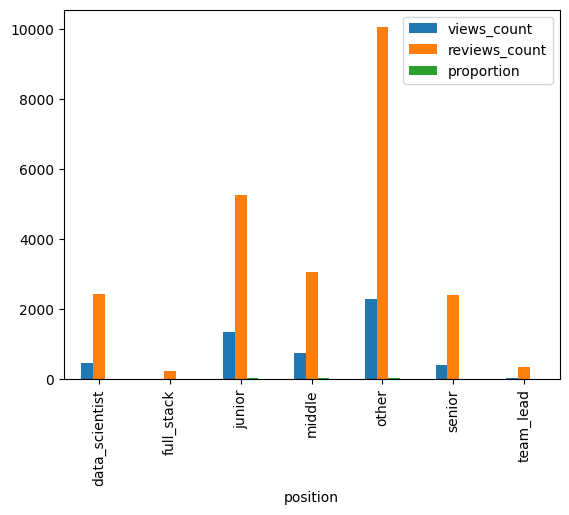

In [641]:
review_stat.plot.bar();

At present moment the most popular vacansy is required scraping skill

In [642]:
df.sort_values(by='views_count', ascending=False)[['title', 'views_count', 'reviews_count', 'requirements']].head(1)

,title,views_count,reviews_count,requirements
60,Data Scrap Specialist (Python),233,698,"['· Product', '· Тільки віддалено', '· Без дос..."


The table reveals that the highest number of job offers corresponds to the roles of Senior and Data Scientist, with the "Other" category excluded. Additionally, a notable pattern emerges where a significant number of companies seek candidates for both Senior and Middle positions, surpassing other combinations. This trend is attributed to instances where a single company has multiple open positions for different experience levels within its workforce requirements.

In [643]:
position_stat = df.groupby('position').nunique()[['title', 'company']]
position_stat

,title,company
position,,
data_scientist,19,17
full_stack,4,4
junior,7,9
middle,13,21
other,51,57
senior,28,31
team_lead,10,10


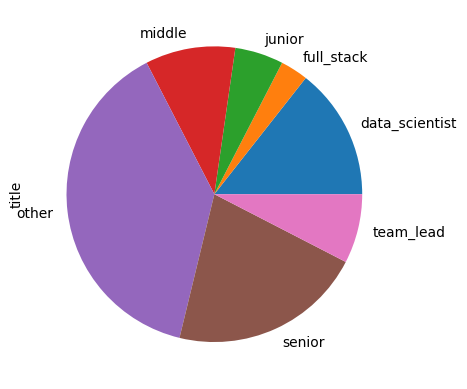

In [644]:
position_stat.title.plot.pie();

# Requirements correction

In [645]:
df.requirements.unique()

array(["['· Product', '· Office або Remote', '· 3 роки досвіду']",
       "['· Тільки віддалено', '· 5 років досвіду', '· Upper-Intermediate']",
       "['· Product', '· Office або Remote', '· 5 років досвіду', '· Intermediate']",
       "['· Product', '· Office або Remote', '· 5 років досвіду', '· Upper-Intermediate']",
       "['· Тільки віддалено', '· 5 років досвіду', '· Intermediate']",
       "['· Product', '· Тільки віддалено', '· 5 років досвіду', '· Upper-Intermediate']",
       "['· Office або Remote', '· 3 роки досвіду', '· Upper-Intermediate']",
       "['· Office або Remote', '· 5 років досвіду', '· Upper-Intermediate']",
       "['· Product', '· Тільки віддалено', '· 2 роки досвіду', '· Pre-Intermediate']",
       "['· Product', '· Тільки віддалено', '· 2 роки досвіду', '· Intermediate']",
       "['· Product', '· Тільки віддалено', '· Без досвіду', '· Upper-Intermediate']",
       "['· Office або Remote', '· 2 роки досвіду', '· Upper-Intermediate']",
       "['· Product'

In [646]:
def phrase_search(phrases, text):
    for phrase in phrases:
        if phrase.lower() in text.lower():
            return True
    return False

def simplify_decorator(field_and_keywords):
    def decorator(func):
        def wrapper(income):
            income_lower = income.lower()
            for output, key_phrases in field_and_keywords.items():
                if phrase_search(key_phrases, income_lower):
                    return output
            return np.nan
        return wrapper
    return decorator

type = {
    'only_remote': ['Тільки віддалено'],
    'office_or_remote': ['Office або Remote'],
    'remote': ['Remote'],
    'office': ['Office'],
    'only_office': ['Тільки офіс'],
    'gibryd': ['Гібридна робота']
}

experience = {
    5: ['5'],
    3: ['3'],
    2: ['2'],
    1: ['1'],
    0: ['Без досвіду']
}

english = {
    1: ['Pre-Intermediate'],
    3: ['Upper-Intermediate'],
    2: ['Intermediate'],
    4: ['Advanced/Fluent']
}

@simplify_decorator(type)
def type_simplify(title):
    return title

@simplify_decorator(experience)
def experience_simplify(title):
    return title

@simplify_decorator(english)
def english_simplify(title):
    return title

df['type'] = df['requirements'].apply(type_simplify)
df['experience'] = df['requirements'].apply(experience_simplify)
df['english'] = df['requirements'].apply(english_simplify)

In [657]:
cleaned_df = df[['views_count','reviews_count','position','type','experience','english']]
cleaned_df

,views_count,reviews_count,position,type,experience,english
0,6,95,middle,office_or_remote,3,NaN
1,19,45,other,only_remote,5,3.0
2,1,13,senior,office_or_remote,5,2.0
3,2,23,senior,office_or_remote,5,3.0
4,4,21,data_scientist,only_remote,5,2.0
...,...,...,...,...,...,...
182,16,69,data_scientist,office_or_remote,3,2.0
183,121,469,junior,only_remote,2,1.0
184,12,65,other,office_or_remote,2,3.0
185,14,89,senior,office_or_remote,3,3.0


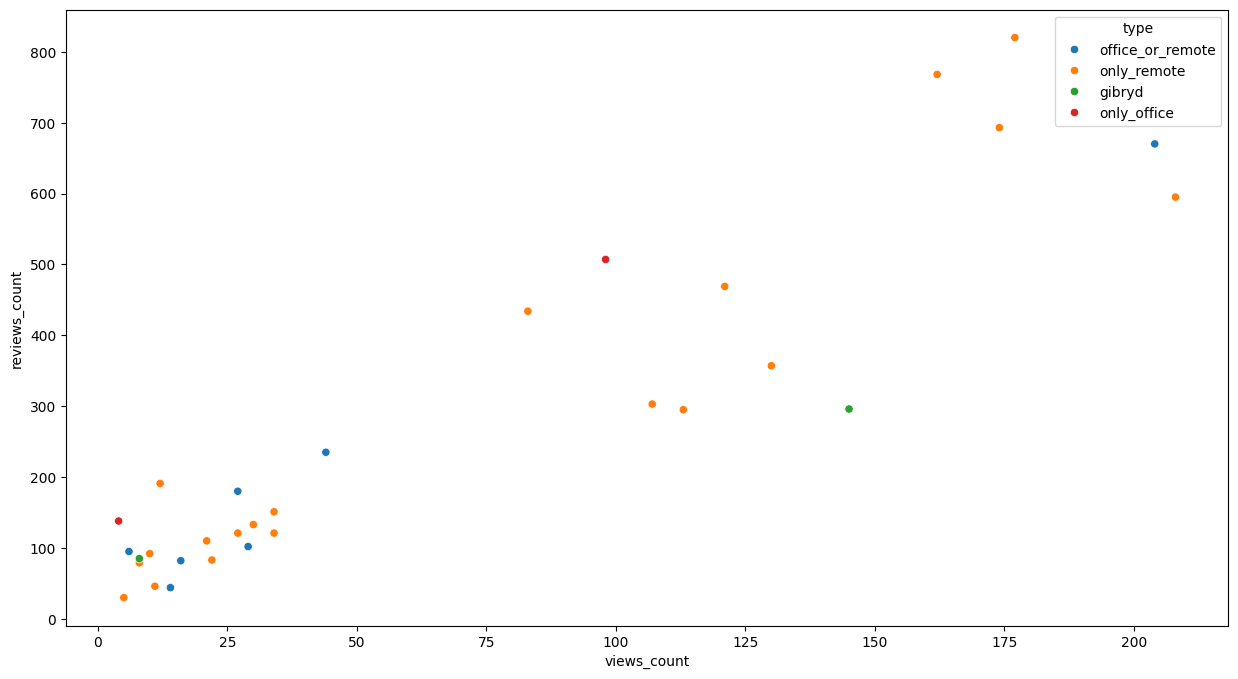

In [656]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df[(df['position'] == 'junior') | (df['position'] == 'middle')],
                x='views_count', y='reviews_count', hue='type');

In [676]:
cleaned_df.groupby('position')['english'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
data_scientist,18.0,2.7,0.8,1.0,2.0,3.0,3.0,4.0
full_stack,4.0,2.8,0.5,2.0,2.8,3.0,3.0,3.0
junior,7.0,1.9,0.9,1.0,1.0,2.0,2.5,3.0
middle,19.0,2.6,0.8,1.0,2.0,3.0,3.0,4.0
other,63.0,2.7,0.6,1.0,2.5,3.0,3.0,4.0
senior,46.0,2.8,0.5,1.0,3.0,3.0,3.0,4.0
team_lead,10.0,2.9,0.9,1.0,3.0,3.0,3.0,4.0


In [675]:
cleaned_df.groupby('position')['experience'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
data_scientist,20.0,3.5,1.9,0.0,2.8,5.0,5.0,5.0
full_stack,5.0,4.2,1.1,3.0,3.0,5.0,5.0,5.0
junior,9.0,0.8,0.7,0.0,0.0,1.0,1.0,2.0
middle,22.0,2.6,0.8,1.0,2.0,3.0,3.0,5.0
other,73.0,3.1,1.3,0.0,2.0,3.0,5.0,5.0
senior,48.0,4.4,1.0,2.0,3.0,5.0,5.0,5.0
team_lead,10.0,4.8,0.6,3.0,5.0,5.0,5.0,5.0


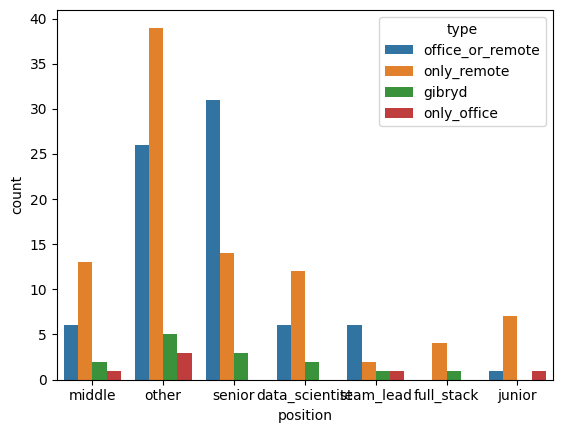

In [674]:
sns.countplot(data=cleaned_df, x='position', hue='type');